In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

 Write dataframes to .csv files and read them in for csv,html,and api formats

In [2]:
df1 = pd.read_csv("diabetes_csv_file.csv")
df1.head()

,NumChildren,Glucose_2Hr_AfterMeal,BloodPressure_Diastolic,SkinThickness,Insulin_2Hr_AfterMeal,BMI,Genetic_DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [3]:
df2 = pd.read_csv("diabetes_html_file.csv")
df2.head()

,Text,Feature
0,At a glance,NaN
1,NaN,NaN
2,Diabetes estimates (20-79 y),NaN
3,"People with diabetes, in 1,000s",26813.6
4,Age-adjusted comparative prevalence of diabete...,10.3


In [4]:
df3 = pd.read_csv("diabetes_api_file.csv")
df3['age_group'] = (
    df3['age_group'].fillna(0)
    .astype(int)
    .astype(object)
    .where(df3['age_group'].notnull())
)
df3.head()

,case_month,state,state_fips_code,county,county_fips_code,age_group,sex,race,ethnicity,process_used,...,classid,data_value_type,topicid,topic,break_out_category,class,locationdesc,response,confidence_limit_low,sample_size
0,2020-10,MI,26.0,EMMET,26047.0,50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02,AL,1.0,TALLAPOOSA,1123.0,31,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08,SC,45.0,CHEROKEE,45021.0,32,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02,AR,5.0,CRITTENDEN,5035.0,21,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-07,SC,45.0,JASPER,45053.0,33,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Write each dataset to a database table

In [5]:
# create a database named diabetes
cnt = sqlite3.connect('diabetes.sqlite') 

use df.to_sql to write dataframes into sql using 'cnt' to write into diabetes database

In [6]:
df1.to_sql(
    name="symptoms",
    con=cnt,
    if_exists="append",
    index=False
)

In [7]:
df2.to_sql(
    name="estimates",
    con=cnt,
    if_exists="append",
    index=False
)

In [8]:
df3.to_sql(
    name="regions",
    con=cnt,
    if_exists="append",
    index=False
)

Verify tables are in SQL database

In [9]:
cur = cnt.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('symptoms',), ('estimates',), ('regions',), ('features',)]


View schema of symptoms table

In [10]:
cur.execute("SELECT sql FROM sqlite_master WHERE name=?;", ['symptoms'])
cur.fetchall()



[('CREATE TABLE "symptoms" (\n"NumChildren" REAL,\n  "Glucose_2Hr_AfterMeal" REAL,\n  "BloodPressure_Diastolic" REAL,\n  "SkinThickness" REAL,\n  "Insulin_2Hr_AfterMeal" REAL,\n  "BMI" REAL,\n  "Genetic_DiabetesPedigreeFunction" REAL,\n  "Age" INTEGER,\n  "Outcome" REAL\n)',)]

In [11]:
cur.execute("SELECT sql FROM sqlite_master WHERE name=?;", ['estimates'])
cur.fetchall()

[('CREATE TABLE "estimates" (\n"Text" TEXT,\n  "Feature" REAL\n)',)]

In [12]:
cur.execute("SELECT sql FROM sqlite_master WHERE name=?;", ['regions'])
cur.fetchall()

[('CREATE TABLE "regions" (\n"case_month" TEXT,\n  "state" TEXT,\n  "state_fips_code" REAL,\n  "county" TEXT,\n  "county_fips_code" REAL,\n  "age_group" TEXT,\n  "sex" TEXT,\n  "race" TEXT,\n  "ethnicity" TEXT,\n  "process_used" TEXT,\n  "exposure_yn" TEXT,\n  "current_status" TEXT,\n  "symptom_status" TEXT,\n  "hosp_yn" TEXT,\n  "icu_yn" TEXT,\n  "death_yn" TEXT,\n  "geolocation" TEXT,\n  "data_value" REAL,\n  "break_out" TEXT,\n  "breakoutid" TEXT,\n  "confidence_limit_high" REAL,\n  "responseid" TEXT,\n  "breakoutcategoryid" TEXT,\n  "question" TEXT,\n  ":@computed_region_bxsw_vy29" REAL,\n  "datasource" TEXT,\n  "data_value_unit" TEXT,\n  "locationid" REAL,\n  ":@computed_region_he4y_prf8" REAL,\n  "display_order" REAL,\n  "year" REAL,\n  "questionid" TEXT,\n  "locationabbr" TEXT,\n  "classid" TEXT,\n  "data_value_type" TEXT,\n  "topicid" TEXT,\n  "topic" TEXT,\n  "break_out_category" TEXT,\n  "class" TEXT,\n  "locationdesc" TEXT,\n  "response" TEXT,\n  "confidence_limit_low" REAL,

In [13]:
# outer join using age  in python pandas
df3 = df3.rename(columns = {"age_group":"Age"})
outer_join_df=pd.merge(df1, df3, on='Age', how='outer')
outer_join_df.head()


,NumChildren,Glucose_2Hr_AfterMeal,BloodPressure_Diastolic,SkinThickness,Insulin_2Hr_AfterMeal,BMI,Genetic_DiabetesPedigreeFunction,Age,Outcome,case_month,...,classid,data_value_type,topicid,topic,break_out_category,class,locationdesc,response,confidence_limit_low,sample_size
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# join based on index python pandas
df_index = pd.merge(outer_join_df, df2, right_index=True, left_index=True)
df_index


,NumChildren,Glucose_2Hr_AfterMeal,BloodPressure_Diastolic,SkinThickness,Insulin_2Hr_AfterMeal,BMI,Genetic_DiabetesPedigreeFunction,Age,Outcome,case_month,...,topicid,topic,break_out_category,class,locationdesc,response,confidence_limit_low,sample_size,Text,Feature
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,At a glance,NaN
1,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diabetes estimates (20-79 y),NaN
3,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"People with diabetes, in 1,000s",26813.6
4,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0,2020-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Age-adjusted comparative prevalence of diabete...,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,7.0,107.0,74.0,23.0,30.5,29.6,0.254,31.0,1.0,2020-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mean diabetes-related health expenditure per p...,NaN
124,7.0,107.0,74.0,23.0,30.5,29.6,0.254,31.0,1.0,2020-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Demographics,NaN
125,7.0,107.0,74.0,23.0,30.5,29.6,0.254,31.0,1.0,2020-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Total adult population (20-79 y), in 1,000s",261129.4
126,7.0,107.0,74.0,23.0,30.5,29.6,0.254,31.0,1.0,2021-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Population of children (0-14 y), in 1,000s",NaN


In [15]:
df_index.to_sql(
    name="features",
    con=cnt,
    if_exists="append",
    index=False
)

In [16]:
cur = cnt.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cur.fetchall())

[('symptoms',), ('estimates',), ('regions',), ('features',)]


Text(0.5, 1.0, 'Distribution of Age')

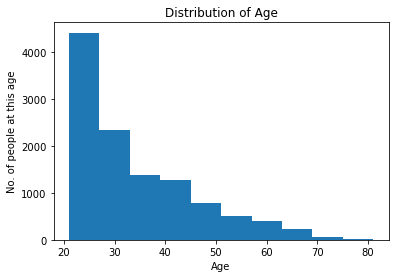

In [17]:
df = pd.read_sql_query('SELECT Age FROM symptoms',cnt)

# plotting the points 
# plotting a histogram
plt.hist(df['Age'])
  
# x-axis label
plt.xlabel('Age')
# frequency label
plt.ylabel('No. of people at this age')
# plot title
plt.title('Distribution of Age')



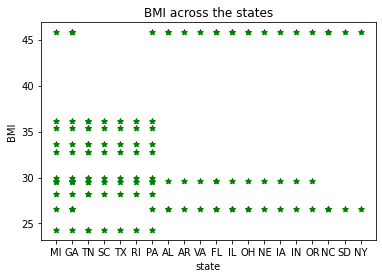

In [19]:
df = pd.read_sql_query('SELECT state,BMI FROM features',cnt)
# plotting a bar chart
# plotting points as a scatter plot
plt.scatter(df['state'],df['BMI'], label= "stars", color= "green", 
            marker= "*", s=30)
  
# naming the x-axis
plt.xlabel('state')
# naming the y-axis
plt.ylabel('BMI')
# plot title
plt.title('BMI across the states')
  
# function to show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of States with numbers of diabetes cases')

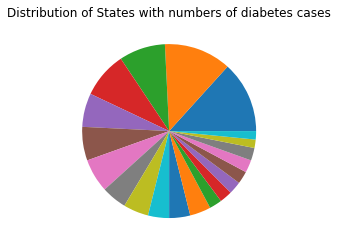

In [20]:
data = (df['state'].value_counts())
plt.pie(data) 
plt.title('Distribution of States with numbers of diabetes cases')

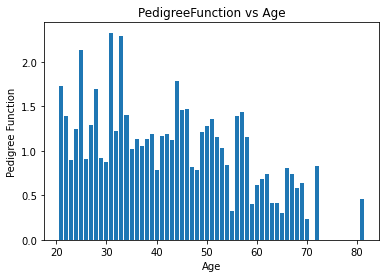

In [21]:
df = pd.read_sql_query('SELECT Genetic_DiabetesPedigreeFunction,Age FROM symptoms',cnt)

plt.bar(df['Age'],df['Genetic_DiabetesPedigreeFunction'])
plt.title('PedigreeFunction vs Age')
plt.xlabel('Age')
plt.ylabel('Pedigree Function')

plt.show()


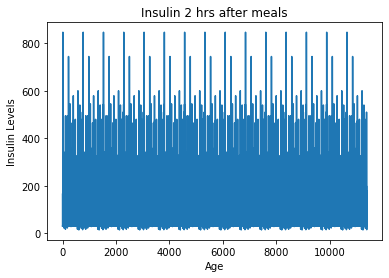

In [22]:
df = pd.read_sql_query('SELECT Insulin_2Hr_AfterMeal,Age FROM symptoms',cnt)

plt.plot(range(len(df['Insulin_2Hr_AfterMeal'])),df['Insulin_2Hr_AfterMeal'])
plt.title('Insulin 2 hrs after meals')
plt.xlabel('Age')
plt.ylabel('Insulin Levels')

plt.show()